In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#  Task 1: Data Cleaning

In [11]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Load the dataset
data_path = "/kaggle/input/heart-dataset/heart.csv"
df = pd.read_csv(data_path)

# Task 1: Data Cleaning
def data_cleaning(df):
    print("Initial Dataset Shape:", df.shape)
    
    # Handling missing values
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values[missing_values > 0])
    
    # Fill missing values (if any) with median
    df.fillna(df.median(), inplace=True)
    
    # Handle outliers using IQR method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Filtering out the outliers
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    print("Cleaned Dataset Shape:", df.shape)
    return df

df = data_cleaning(df)

Initial Dataset Shape: (1025, 14)
Missing Values:
Series([], dtype: int64)
Cleaned Dataset Shape: (769, 14)


# Task 2: Exploratory Data Analysis (EDA)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       769 non-null    int64  
 1   sex       769 non-null    int64  
 2   cp        769 non-null    int64  
 3   trestbps  769 non-null    int64  
 4   chol      769 non-null    int64  
 5   fbs       769 non-null    int64  
 6   restecg   769 non-null    int64  
 7   thalach   769 non-null    int64  
 8   exang     769 non-null    int64  
 9   oldpeak   769 non-null    float64
 10  slope     769 non-null    int64  
 11  ca        769 non-null    int64  
 12  thal      769 non-null    int64  
 13  target    769 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 90.1 KB
None





Statistical Summary:
              age         sex          cp    trestbps        chol    fbs  \
count  769.000000  769.000000  769.000000  769.000000  769.000000  769.0   
mean    53.431730    0.691

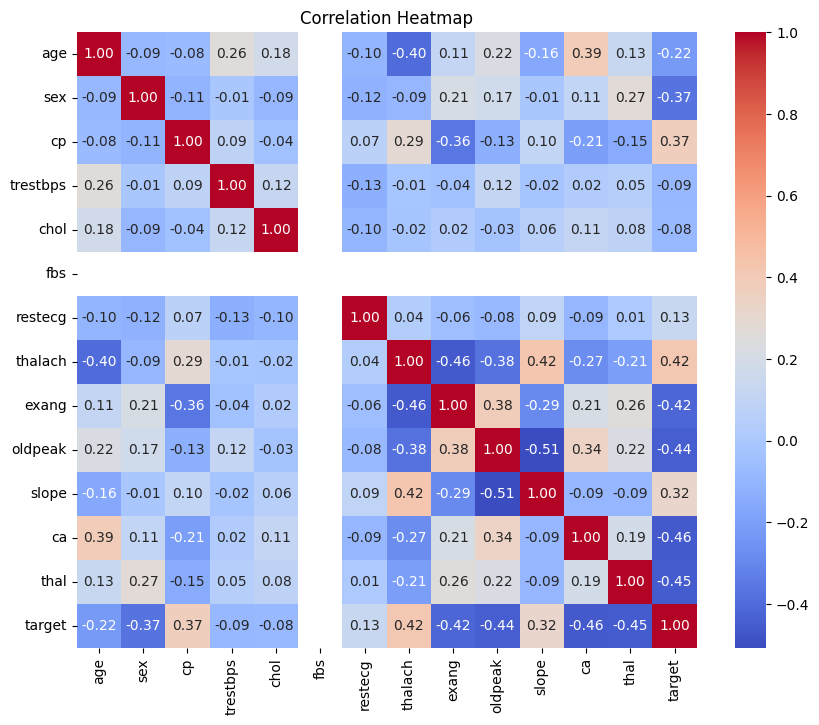

In [12]:
# Task 2: Exploratory Data Analysis (EDA)
def exploratory_data_analysis(df):
    print("Dataset Info:")
    print(df.info())
    print("\n\n\n")
    
    print("\nStatistical Summary:")
    print(df.describe())
    print("\n\n\n")
    
    
    print("\nCorrelation Matrix:")
    correlation_matrix = df.corr()
    print(correlation_matrix)
    print("\n\n\n")
    
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()

exploratory_data_analysis(df)


# Task 3: Question Formulation and Solving


1. What is the average age of individuals in the dataset?
Average Age: 53.431729518855654

2. What is the gender distribution in the dataset?
sex
1    532
0    237
Name: count, dtype: int64


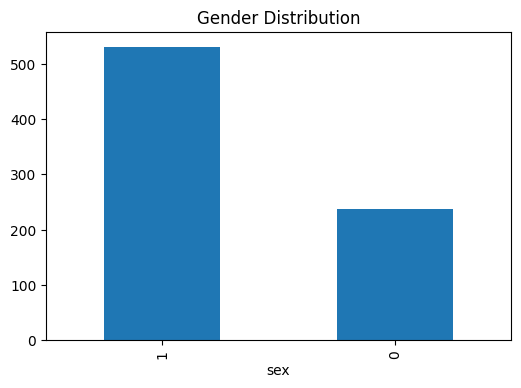


3. How many individuals have heart disease?
target
1    422
0    347
Name: count, dtype: int64


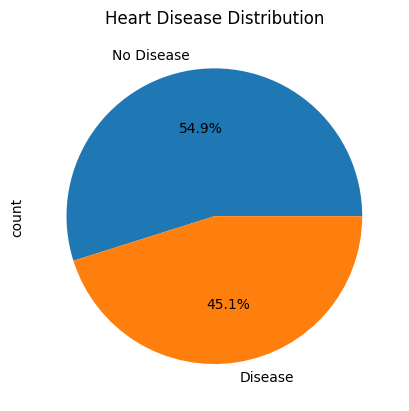


4. What is the relationship between age and maximum heart rate?


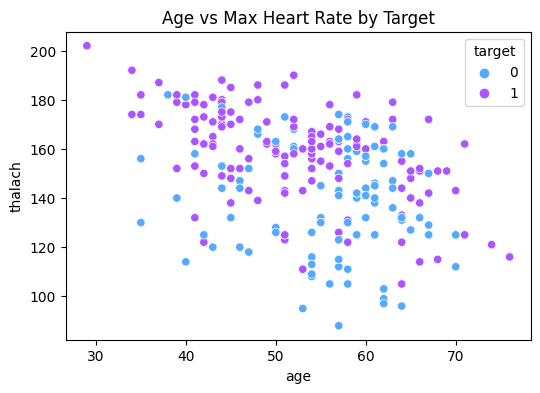


5. What are the cholesterol levels for individuals with and without heart disease?


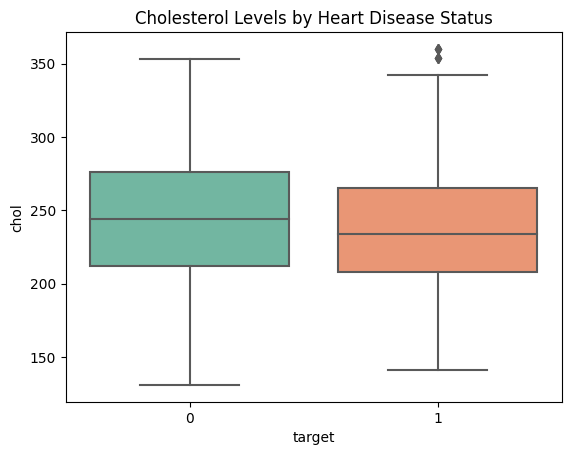


6. How does chest pain type correlate with heart disease?


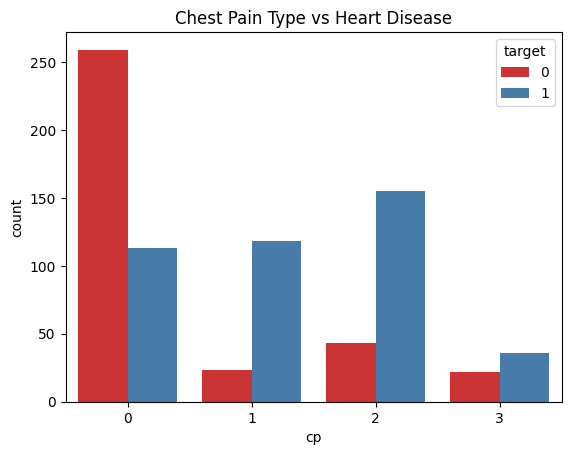


7. What is the distribution of resting blood pressure (trestbps)?


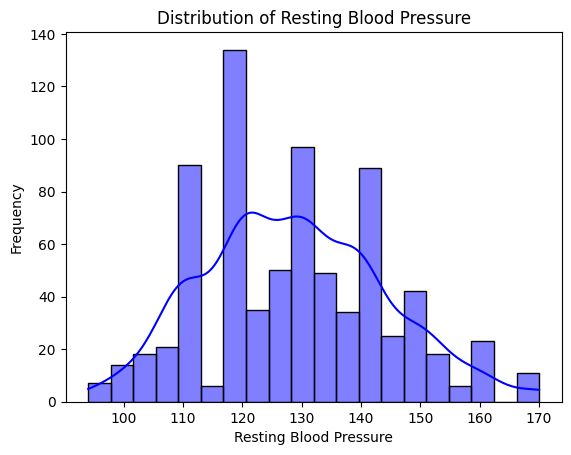

In [13]:

# Task 3: Question Formulation and Solving
def question_formulation(df):
    print("\n1. What is the average age of individuals in the dataset?")
    print("Average Age:", df['age'].mean())

    print("\n2. What is the gender distribution in the dataset?")
    plt.figure(figsize=(6, 4))
    gender_distribution = df['sex'].value_counts()
    print(gender_distribution)
    gender_distribution.plot(kind='bar', title='Gender Distribution')
    plt.show()

    print("\n3. How many individuals have heart disease?")
    heart_disease_count = df['target'].value_counts()
    print(heart_disease_count)
    heart_disease_count.plot(kind='pie', autopct='%1.1f%%', labels=['No Disease', 'Disease'], title='Heart Disease Distribution')
    plt.show()

    print("\n4. What is the relationship between age and maximum heart rate?")
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='cool')
    plt.title("Age vs Max Heart Rate by Target")
    plt.show()

    print("\n5. What are the cholesterol levels for individuals with and without heart disease?")
    sns.boxplot(data=df, x='target', y='chol', palette='Set2')
    plt.title("Cholesterol Levels by Heart Disease Status")
    plt.show()

    print("\n6. How does chest pain type correlate with heart disease?")
    sns.countplot(data=df, x='cp', hue='target', palette='Set1')
    plt.title("Chest Pain Type vs Heart Disease")
    plt.show()

    print("\n7. What is the distribution of resting blood pressure (trestbps)?")
    sns.histplot(df['trestbps'], bins=20, kde=True, color='blue')
    plt.title("Distribution of Resting Blood Pressure")
    plt.xlabel("Resting Blood Pressure")
    plt.ylabel("Frequency")
    plt.show()

question_formulation(df)


# Task 4: Data Visualization


Creating Additional Visualizations:


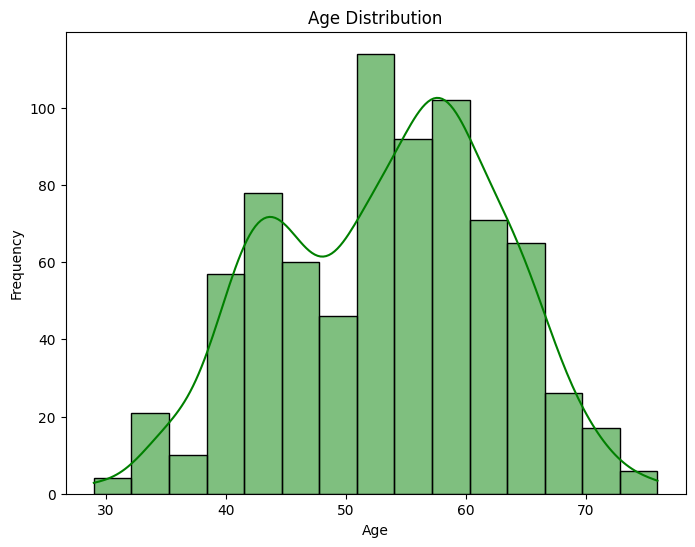

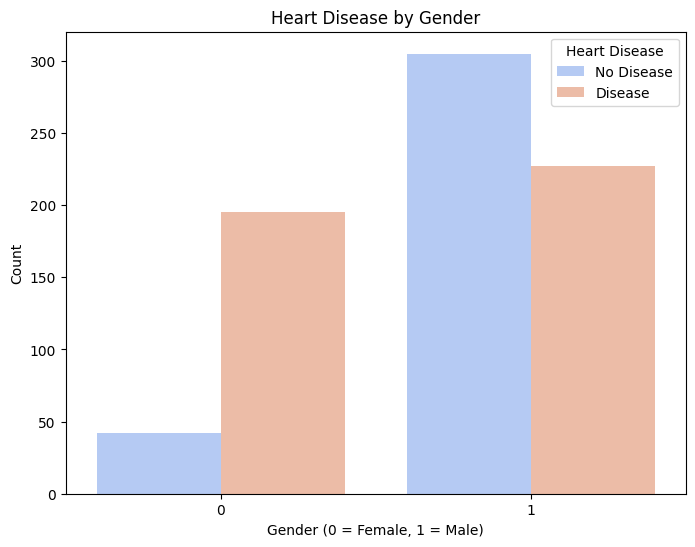

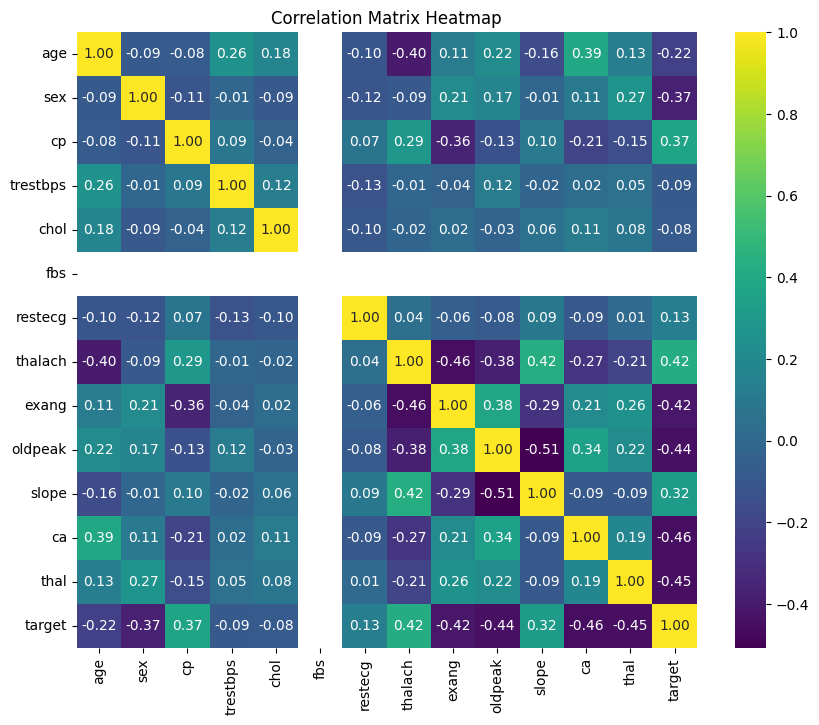

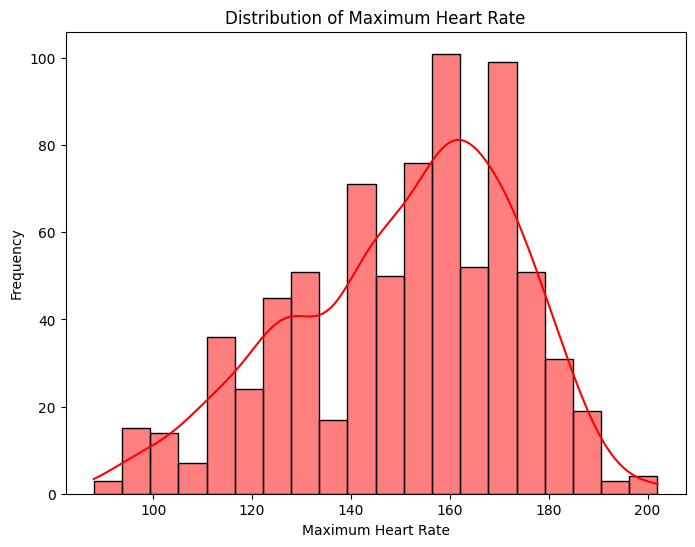

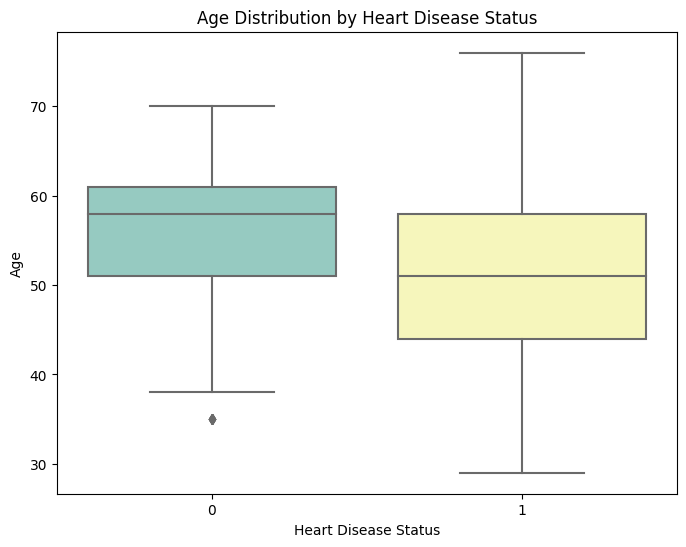

In [14]:
# Task 4: Data Visualization
def data_visualization(df):
    print("\nCreating Additional Visualizations:")

    # Visualization 1: Distribution of Age
    plt.figure(figsize=(8, 6))
    sns.histplot(df['age'], bins=15, kde=True, color='green')
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

    # Visualization 2: Heart Disease by Gender
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='sex', hue='target', palette='coolwarm')
    plt.title("Heart Disease by Gender")
    plt.xlabel("Gender (0 = Female, 1 = Male)")
    plt.ylabel("Count")
    plt.legend(title="Heart Disease", labels=['No Disease', 'Disease'])
    plt.show()

    # Visualization 3: Heatmap of Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
    plt.title("Correlation Matrix Heatmap")
    plt.show()

    # Visualization 4: Distribution of Maximum Heart Rate
    plt.figure(figsize=(8, 6))
    sns.histplot(df['thalach'], bins=20, kde=True, color='red')
    plt.title("Distribution of Maximum Heart Rate")
    plt.xlabel("Maximum Heart Rate")
    plt.ylabel("Frequency")
    plt.show()

    # Visualization 5: Boxplot of Age by Heart Disease Status
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='target', y='age', palette='Set3')
    plt.title("Age Distribution by Heart Disease Status")
    plt.xlabel("Heart Disease Status")
    plt.ylabel("Age")
    plt.show()

data_visualization(df)
